# Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
calendar = pd.read_csv('seattle/calendar.csv')
listings = pd.read_csv('seattle/listings.csv')
reviews = pd.read_csv('seattle/reviews.csv')

In [3]:
listings.price.head()
listings['price'] = listings.price.replace('[\$,]', '', regex=True).astype(float)
listings['host_response_rate'] = listings.host_response_rate.replace('[%]', '', regex=True).astype(float)
listings['security_deposit'] = listings.security_deposit.replace('[\$,]', '', regex=True).astype(float)

In [4]:
c_var = [] # -> continous variable
d_var = [] # -> discrete variable
for column in list(listings.columns):
    if listings[column].dtype in ['int64', 'float64']:
        c_var.append(column)
    else:
        d_var.append(column)

In [5]:
# remove the variables that are actually ordinal from continous variable
c_var.remove('scrape_id')
c_var.remove('host_id')
c_var.remove('id')
c_var.remove('license')

# remove the variables that not relevant to c_var
print('Continous variable:')
print(c_var)
print()

Continous variable:
['host_response_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'security_deposit', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']



In [6]:
new_d_var = []
for var in d_var:
    if len(listings[var].unique()) < 100 and len(listings[var].unique()) > 1:
        new_d_var.append(var)
d_var = new_d_var
d_var.append('price')
print('Discrete variable:')
print(d_var)
print()

Discrete variable:
['host_response_time', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'smart_location', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'extra_people', 'calendar_updated', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification', 'price']



In [7]:
listings_continous = listings[c_var]
listings_discrete = listings[d_var]

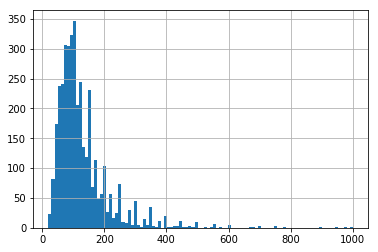

In [8]:
listings.price.hist(bins=100)

## Analyze Continuous and Ordinal Integer Variables

Seeing correlation between price and other continous and ordinal integer variables

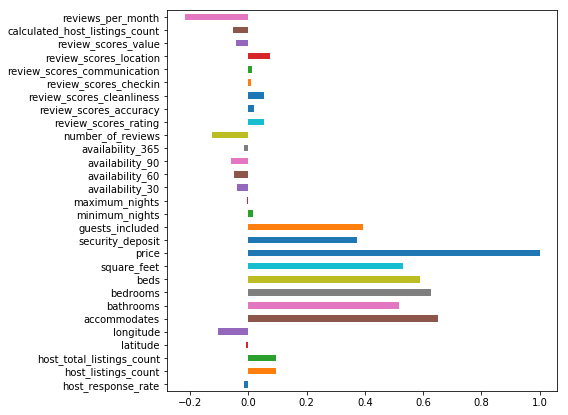

In [35]:
listings_corr_continous = listings_continous.corr()
listings_corr_continous['price'].plot(kind='barh', figsize=(7,7))
# 

## Analyze correlation between price and other discrete variables

In [10]:
listings_discrete.head()

,host_response_time,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,property_type,room_type,bed_type,extra_people,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
0,within a few hours,100%,f,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,Apartment,Entire home/apt,Real Bed,$5.00,4 weeks ago,f,moderate,f,f,85.0
1,within an hour,100%,t,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,Apartment,Entire home/apt,Real Bed,$0.00,today,f,strict,t,t,150.0
2,within a few hours,100%,f,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,House,Entire home/apt,Real Bed,$25.00,5 weeks ago,f,strict,f,f,975.0
3,NaN,NaN,f,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,Apartment,Entire home/apt,Real Bed,$0.00,6 months ago,f,flexible,f,f,100.0
4,within an hour,NaN,f,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,House,Entire home/apt,Real Bed,$15.00,7 weeks ago,f,strict,f,f,450.0


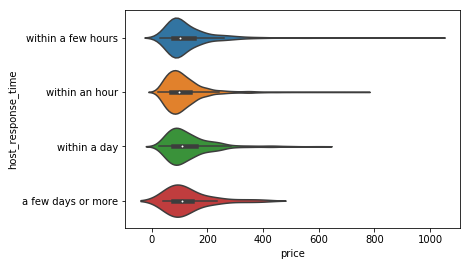

In [11]:
sns.violinplot(data=listings_discrete, x="price",y="host_response_time")

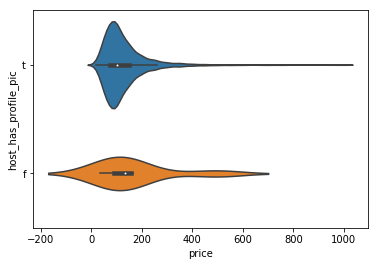

In [12]:
sns.violinplot(data=listings_discrete, x="price",y="host_has_profile_pic")

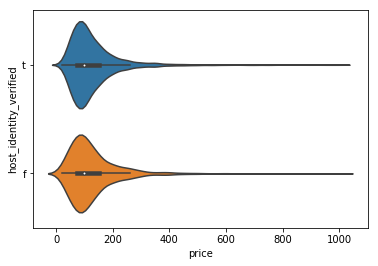

In [13]:
sns.violinplot(data=listings_discrete, x="price",y="host_identity_verified")

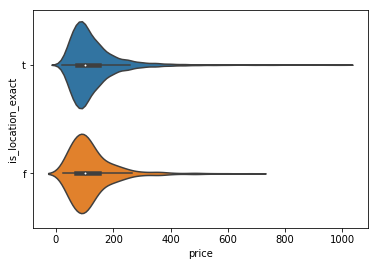

In [14]:
sns.violinplot(data=listings_discrete, x="price",y="is_location_exact")

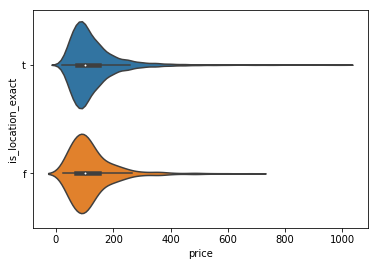

In [15]:
sns.violinplot(data=listings_discrete, x="price",y="is_location_exact")

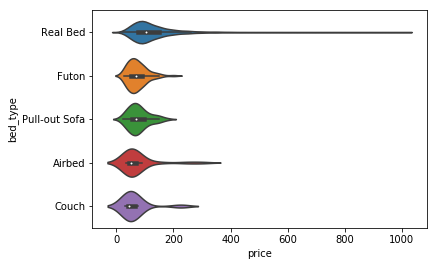

In [16]:
sns.violinplot(data=listings_discrete, x="price",y="bed_type")

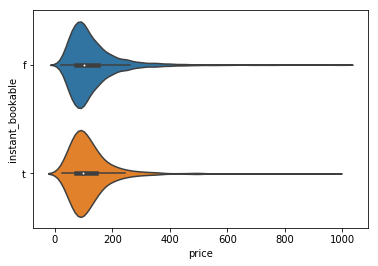

In [17]:
sns.violinplot(data=listings_discrete, x="price",y="instant_bookable")

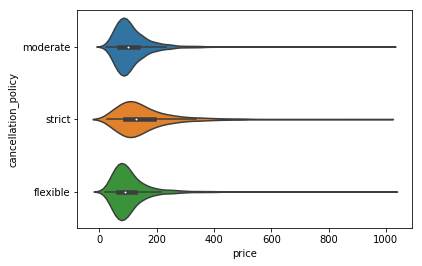

In [18]:
sns.violinplot(data=listings_discrete, x="price",y="cancellation_policy")

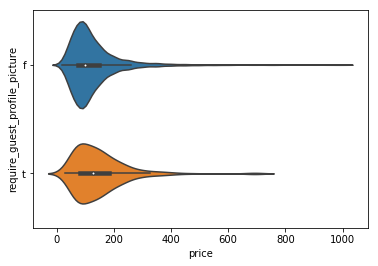

In [19]:
sns.violinplot(data=listings_discrete, x="price",y="require_guest_profile_picture")

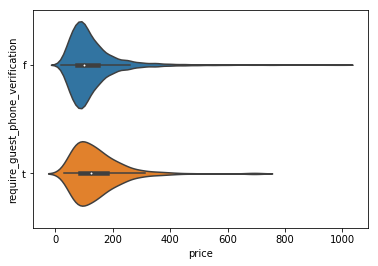

In [20]:
sns.violinplot(data=listings_discrete, x="price",y="require_guest_phone_verification")

## Analyze location

Get latitutde-longitude of the popular spot on seattle

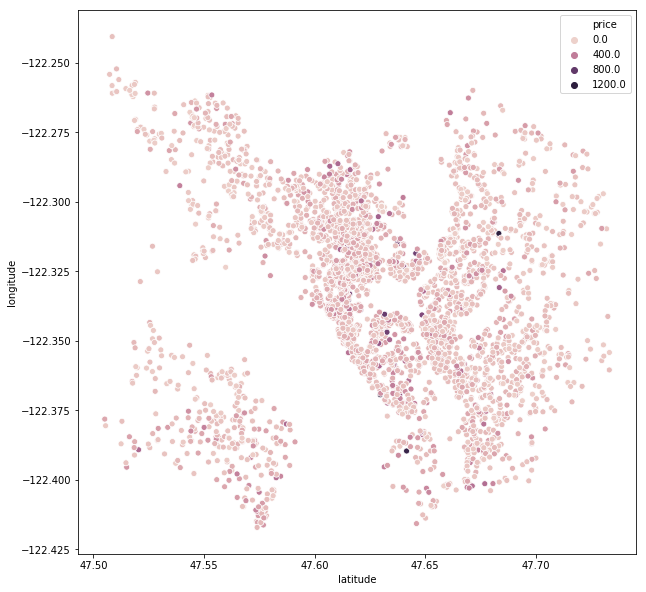

In [21]:
#listings[['latitude', 'longitude']].plot.scatter(x='latitude', y='longitude')
# fig, ax = pyplot.subplots(figsize=a4_dims)
# fig, ax = pyplot.subplots(figsize=(10,10))
plt.figure(figsize=(10,10))
sns.scatterplot(x="latitude", y="longitude", hue="price", data=listings)

/home/ramosjanoah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ramosjanoah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


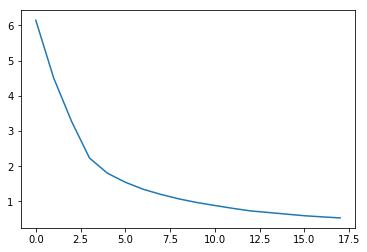

In [22]:
from sklearn.cluster import KMeans
import numpy as np
from copy import copy

scores = []

for i in range(2,20):
    n_cluster = i
    unclustered = listings[['latitude', 'longitude']]
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(unclustered)
    clustered = unclustered
    cluster_name = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # the cluster is index
    cluster = [cluster_name[c] for c in list(kmeans.predict(unclustered))]
    clustered['cluster'] = cluster
    clustered['price'] = listings.price
    score = kmeans.inertia_
    scores.append(score)

pd.Series(scores).plot.line()

base on chart above, we choose 3 as a best K for K-Means

In [23]:
best_k = 3

unclustered = listings[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(unclustered)
clustered = unclustered
cluster_name = 'ABCDEFGHIJKLMNOPQRST' # the cluster is index
cluster = [cluster_name[c] for c in list(kmeans.predict(unclustered))]
clustered['cluster'] = cluster
clustered['price'] = listings.price

/home/ramosjanoah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ramosjanoah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


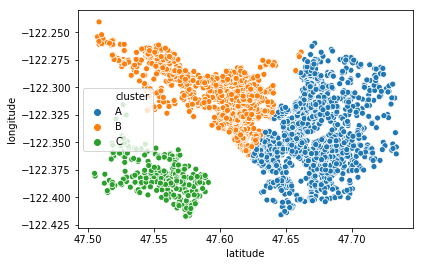

In [24]:
# plt.figure(figsize=(10,6))
sns.scatterplot(x="latitude", y="longitude", hue="cluster", data=clustered)

In [25]:
clustered.groupby('cluster').count()

,latitude,longitude,price
cluster,,,
A,1617,1617,1617
B,1915,1915,1915
C,286,286,286


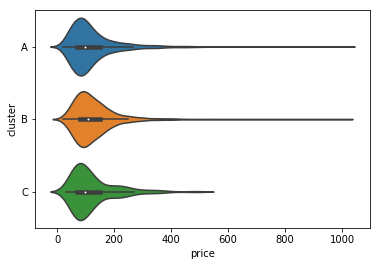

In [26]:
sns.violinplot(data=clustered, x="price",y="cluster")

As we can see, cluster of location also not correlated well with the price

## Create regression model

Prepare the combination of the feature

In [27]:
# Do the regression 1
significant_continous_column = ['guests_included', 'square_feet', 'beds', 'bedrooms', 'bathrooms', 'accommodates', 'reviews_per_month']
all_continous_column = c_var
if 'price' in all_continous_column:
    all_continous_column.remove('price')

all_discrete_column = d_var
if 'price' in all_discrete_column:
    all_discrete_column.remove('price')

Import libraries..

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt

Prepare the model

In [29]:
linear = LinearRegression(normalize=False)
tree = DecisionTreeRegressor(max_depth=None)
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()

feature_sets = [significant_continous_column, 
                all_continous_column, 
                all_discrete_column, 
                (significant_continous_column, all_discrete_column),
                (all_continous_column, all_discrete_column)]
var_type = ['cont', 'cont', 'discrete', 'cont-discrete', 'cont-discrete']

Do 10 cross validation, save the result..

In [30]:
fold_results = []
for i_feature_set, feature_set in enumerate(feature_sets):
    if var_type[i_feature_set] == 'cont':
        listings_temp = listings[feature_set + ['price']]
        listings_temp.fillna(listings_temp.mean(), inplace=True)
    elif var_type[i_feature_set] == 'discrete':
        listings_temp = listings[feature_set + ['price']]
        listings_temp.fillna('Unknown', inplace=True)
        listings_temp = pd.get_dummies(listings_temp)
        feature_set = list(listings_temp.columns)
        if 'price' in feature_set:
            feature_set.remove('price')
    elif var_type[i_feature_set] == 'cont-discrete':
        listings_temp_0 = listings[feature_set[0] + ['price']]
        listings_temp_0.fillna(listings_temp_0.mean(), inplace=True)
        listings_temp_1 = listings[feature_set[1]]
        listings_temp_1.fillna('Unknown', inplace=True)
        listings_temp_1 = pd.get_dummies(listings_temp_1)
       
        listings_temp = pd.concat([listings_temp_0, listings_temp_1], axis=1)
        feature_set = list(listings_temp.columns)
        if 'price' in feature_set:
            feature_set.remove('price')
        
    # Do 10 cross validation~
    fold = 10
    amount_data_per_fold = len(listings_temp) // fold
    chunks = []

    # chunk it..
    for i in range(0,fold):
        if i == fold-1:
            chunks.append(listings_temp.loc[(fold-1)*amount_data_per_fold:])
        else:
            chunks.append(listings_temp.loc[i*amount_data_per_fold:(i+1)*amount_data_per_fold])
    
    # prepare to save the model
    linear_fold_result = []
    tree_fold_result = []
    gb_fold_result = []
    rf_fold_result = []
    
    # train for every fold
    for i_test in range(0,fold):
        train = []
        for i in range(0,fold):
            if i == i_test:
                test = chunks[i]
            else:
                train.append(chunks[i])
        train = pd.concat(train)

        # train model
        linear.fit(X=train[feature_set], y=train.price)
        linear_fold_result.append(linear.predict(X=test[feature_set]))
        
        tree.fit(X=train[feature_set], y=train.price)
        tree_fold_result.append(tree.predict(X=test[feature_set]))

        gb.fit(X=train[feature_set], y=train.price)
        gb_fold_result.append(gb.predict(X=test[feature_set]))

        rf.fit(X=train[feature_set], y=train.price)
        rf_fold_result.append(rf.predict(X=test[feature_set]))
    
    # compile all the result
    fold_results.append([linear_fold_result, tree_fold_result, gb_fold_result, rf_fold_result])

print("Cross validation done.")

/home/ramosjanoah/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/ramosjanoah/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/ramosjanoah/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/home/ra

Cross validation done.


In [31]:
avg = []
for fold_model_results in fold_results:
    for fold_result in fold_model_results:
        average = 0
        for i in range(0, fold):
            y_predicted = list(fold_result[i])
            y_actual = list(chunks[i].price)
            rms = sqrt(mean_squared_error(y_actual, y_predicted))
            #print(rms)
            average += rms
        average = average / fold
        print('Average {}'.format(average))
        avg.append(average)
    print()

Average 64.36420476944284
Average 86.90797065966277
Average 62.83899943796365
Average 69.55934448203685

Average 62.768570086981164
Average 82.42842510711314
Average 57.65344583270777
Average 62.844610460357636

Average 940637034131337.2
Average 100.13618797012671
Average 78.89137285294524
Average 82.2296796967634

Average 112007590975.64645
Average 77.92259905615909
Average 61.281727962513266
Average 61.791225035911886

Average 20181707.107118227
Average 75.82752595482152
Average 57.08552561316751
Average 59.932902705748425



## Analyze more about GB-Regression

- Using last fold
- Feature set: all continous variables

In [32]:
gb.fit(X=train[all_continous_column], y=train.price)
result = gb.predict(X=test[all_continous_column])

In [33]:
test[all_continous_column].head()

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
3429,100.000000,1.0,1.0,47.659640,-122.270778,4,1.0,2.0,4.0,854.618557,...,15,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,0.960000
3430,100.000000,1.0,1.0,47.657383,-122.285788,2,1.0,1.0,1.0,854.618557,...,12,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,2.550000
3431,94.886798,1.0,1.0,47.659986,-122.272246,4,1.0,2.0,2.0,854.618557,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919
3432,100.000000,1.0,1.0,47.657241,-122.284774,4,1.0,1.0,2.0,854.618557,...,9,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,2.930000
3433,94.886798,1.0,1.0,47.664591,-122.281644,2,1.0,1.0,1.0,854.618557,...,4,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,0.790000


In [34]:
sqrt(mean_squared_error(test.price, result))

63.59149642110675